# 📊 Analyse exploratoire – Données Synthétiques Assurance Habitation

# chargement des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
import time
sns.set(style="whitegrid")


# chargement de la données affichage des 5 premieres lignes

In [2]:
# Charger les données
df = pd.read_csv('personas_assurance.csv')

# Afficher les premières lignes
df.head()
# verifier les types de données
print(df.dtypes)


client_id                 object
age                        int64
situation_familiale       object
statut_logement           object
type_logement             object
surface_m2                 int64
region                    object
patrimoine_estime          int64
revenu_annuel              int64
assureur                  object
garanties                 object
exclusions                object
nombre_garanties           int64
montant_couvert            int64
cotisation_annuelle        int64
sinistres_déclarés         int64
dernier_sinistre          object
résiliation_précédente    object
paiements_en_retard       object
dtype: object


# copie du dataframe et convertion de la données 

In [3]:
# Copie de travail
df_clean = df.copy()

# Conversion des champs de listes (texte -> liste Python)
df_clean["garanties"] = df_clean["garanties"].apply(ast.literal_eval)
df_clean["exclusions"] = df_clean["exclusions"].apply(ast.literal_eval)

# Vérification des types
df_clean.dtypes
# Afficher les premières lignes du DataFrame nettoyé
df_clean.head()
# afficher la convertion des listes
print(df_clean["garanties"].iloc[0])
print(type(df_clean["garanties"].iloc[0]))
print(df_clean["exclusions"].iloc[0])
print(type(df_clean["exclusions"].iloc[0]))



['Attentats matériels', 'Responsabilité civile', 'Catastrophes naturelles']
<class 'list'>
['Incendie, foudre, explosion, vandalisme', 'Dommages électriques, climatiques, inondation', 'Vol']
<class 'list'>


# visualitation de la données 

In [4]:
# Création d'une nouvelle figure avec 2 lignes et 2 colonnes (4 graphiques)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Graphique 1 : Distribution de l'âge
sns.histplot(df_clean["age"], bins=30, kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title("Distribution de l'âge des clients")
axs[0, 0].set_xlabel("Âge")
axs[0, 0].set_ylabel("Nombre de clients")
axs[0, 0].grid(True)

# Graphique 2 : Répartition des assureurs
sns.countplot(y="assureur", data=df_clean, order=df_clean["assureur"].value_counts().index, ax=axs[0, 1])
axs[0, 1].set_title("Répartition des assureurs")
axs[0, 1].set_xlabel("Nombre de contrats")
axs[0, 1].set_ylabel("Assureur")

# Graphique 3 : Surface vs Cotisation
sns.scatterplot(data=df_clean, x="surface_m2", y="cotisation_annuelle", hue="statut_logement", alpha=0.6, ax=axs[1, 0])
axs[1, 0].set_title("Surface vs Cotisation annuelle")
axs[1, 0].set_xlabel("Surface (m²)")
axs[1, 0].set_ylabel("Cotisation (€)")

# Graphique 4 : Distribution du score_contrat
df_clean["score_contrat"] = df_clean["montant_couvert"] / df_clean["cotisation_annuelle"]
sns.histplot(df_clean["score_contrat"], bins=30, kde=True, color="lightgreen", ax=axs[1, 1])
axs[1, 1].set_title("Distribution du score de contrat")
axs[1, 1].set_xlabel("Score contrat (montant couvert / cotisation)")
axs[1, 1].set_ylabel("Nombre de clients")
axs[1, 1].grid(True)

# Ajustement de la mise en page
plt.tight_layout()

# Crée le dossier s'il n'existe pas
os.makedirs("figures", exist_ok=True)

# Définir le chemin de sauvegarde dans le sous-dossier
tab_graph_path = "figures/tableau_graphiques_assurance.png"

# Sauvegarder le graphique dans ce chemin
plt.savefig(tab_graph_path)
plt.close()

print(f"Image sauvegardée 📊  : {tab_graph_path}")

Image sauvegardée 📊  : figures/tableau_graphiques_assurance.png


#  visualitation de la données par région et statut du logement 

In [5]:
# Dossier de sortie
output_dir = "figures/region_statut"
os.makedirs(output_dir, exist_ok=True)

# Boucle sur les combinaisons Région × Statut logement
for region in df_clean["region"].unique():
    for statut in df_clean["statut_logement"].unique():
        # Filtrage
        df_segment = df_clean[(df_clean["region"] == region) & (df_clean["statut_logement"] == statut)]

        # Skip si segment trop petit
        if len(df_segment) < 30:
            continue

        # Figure
        fig, axs = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle(f"{region} – {statut}", fontsize=16)

        # Graphique 1 : Âge
        sns.histplot(df_segment["age"], bins=30, kde=True, color="skyblue", ax=axs[0, 0])
        axs[0, 0].set_title("Distribution de l'âge")
        axs[0, 0].set_xlabel("Âge")
        axs[0, 0].set_ylabel("Nombre")

        # Graphique 2 : Type logement
        sns.countplot(y="type_logement", data=df_segment, order=df_segment["type_logement"].value_counts().index, ax=axs[0, 1])
        axs[0, 1].set_title("Répartition type logement")
        axs[0, 1].set_xlabel("Nombre")
        axs[0, 1].set_ylabel("Type")

        # Graphique 3 : Surface vs Cotisation
        sns.scatterplot(data=df_segment, x="surface_m2", y="cotisation_annuelle", hue="type_logement", alpha=0.6, ax=axs[1, 0])
        axs[1, 0].set_title("Surface vs Cotisation")
        axs[1, 0].set_xlabel("Surface (m²)")
        axs[1, 0].set_ylabel("Cotisation (€)")

        # Graphique 4 : Score contrat
        sns.histplot(df_segment["score_contrat"], bins=30, kde=True, color="lightgreen", ax=axs[1, 1])
        axs[1, 1].set_title("Distribution du score contrat")
        axs[1, 1].set_xlabel("Score")
        axs[1, 1].set_ylabel("Nombre")

        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Nom de fichier sécurisé
        safe_name = f"{region}__{statut}".replace(" ", "_").replace("–", "-").replace("é", "e").replace(",", "").replace("'", "")
        file_path = f"{output_dir}/graphique_{safe_name}.png"
        plt.savefig(file_path)
        plt.close()

        print(f"✅ Graphique généré : {file_path}")

✅ Graphique généré : figures/region_statut/graphique_Provence-Alpes-Côte_dAzur__Proprietaire.png
✅ Graphique généré : figures/region_statut/graphique_Provence-Alpes-Côte_dAzur__Locataire.png
✅ Graphique généré : figures/region_statut/graphique_Auvergne-Rhône-Alpes__Proprietaire.png
✅ Graphique généré : figures/region_statut/graphique_Auvergne-Rhône-Alpes__Locataire.png
✅ Graphique généré : figures/region_statut/graphique_Nouvelle-Aquitaine__Proprietaire.png
✅ Graphique généré : figures/region_statut/graphique_Nouvelle-Aquitaine__Locataire.png
✅ Graphique généré : figures/region_statut/graphique_Occitanie__Proprietaire.png
✅ Graphique généré : figures/region_statut/graphique_Occitanie__Locataire.png
✅ Graphique généré : figures/region_statut/graphique_Île-de-France__Proprietaire.png
✅ Graphique généré : figures/region_statut/graphique_Île-de-France__Locataire.png


# visualitation de la données par assureurs

In [6]:
# Recalcul du score (au cas où)
df_clean["score_contrat"] = df_clean["montant_couvert"] / df_clean["cotisation_annuelle"]

# Créer un sous-dossier spécifique pour les figures segmentées
os.makedirs("figures/assureurs", exist_ok=True)

# Boucle sur chaque assureur unique
for assureur in df_clean["assureur"].unique():
    # Filtrer le dataset
    df_segment = df_clean[df_clean["assureur"] == assureur]

    # Créer figure 2x2
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f"Analyse exploratoire – {assureur}", fontsize=16)

    # 1. Âge
    sns.histplot(df_segment["age"], bins=30, kde=True, color="skyblue", ax=axs[0, 0])
    axs[0, 0].set_title("Distribution de l'âge")
    axs[0, 0].set_xlabel("Âge")
    axs[0, 0].set_ylabel("Nombre de clients")

    # 2. Statut logement
    sns.countplot(y="statut_logement", data=df_segment, order=df_segment["statut_logement"].value_counts().index, ax=axs[0, 1])
    axs[0, 1].set_title("Statut logement")
    axs[0, 1].set_xlabel("Nombre")
    axs[0, 1].set_ylabel("Statut")

    # 3. Surface vs Cotisation
    sns.scatterplot(data=df_segment, x="surface_m2", y="cotisation_annuelle", hue="type_logement", alpha=0.6, ax=axs[1, 0])
    axs[1, 0].set_title("Surface vs Cotisation")
    axs[1, 0].set_xlabel("Surface (m²)")
    axs[1, 0].set_ylabel("Cotisation (€)")

    # 4. Score contrat
    sns.histplot(df_segment["score_contrat"], bins=30, kde=True, color="lightgreen", ax=axs[1, 1])
    axs[1, 1].set_title("Distribution du score contrat")
    axs[1, 1].set_xlabel("Score contrat")
    axs[1, 1].set_ylabel("Nombre")

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Nettoyage du nom de fichier
    safe_name = assureur.replace(" ", "_").replace("(", "").replace(")", "").replace(",", "")
    file_path = f"figures/assureurs/tableau_{safe_name}.png"
    plt.savefig(file_path)
    plt.close()

    print(f"✅ Sauvegardé : {file_path}")

✅ Sauvegardé : figures/assureurs/tableau_Covéa_MMA_MAAF_GMF.png
✅ Sauvegardé : figures/assureurs/tableau_Matmut.png
✅ Sauvegardé : figures/assureurs/tableau_Macif_Aéma_Groupe.png
✅ Sauvegardé : figures/assureurs/tableau_Crédit_Agricole_Assurances_Pacifica.png
✅ Sauvegardé : figures/assureurs/tableau_Groupe_des_Assurances_du_Crédit_Mutuel.png


# identification des catégories

In [7]:
# Identifier les catégories 
print("Situations familiales :", df_clean["situation_familiale"].unique())
print("Statut logement :", df_clean["statut_logement"].unique())
print("Type logement :", df_clean["type_logement"].unique())
print("Régions :", df_clean["region"].unique())


Situations familiales : ['Veuf(ve)' 'En couple' 'Divorcé(e)' 'Célibataire' 'Marié(e)']
Statut logement : ['Propriétaire' 'Locataire']
Type logement : ['Maison mitoyenne' 'Appartement' 'Maison individuelle isolée']
Régions : ["Provence-Alpes-Côte d'Azur" 'Auvergne-Rhône-Alpes' 'Nouvelle-Aquitaine'
 'Occitanie' 'Île-de-France']


# Encodage des colonnes catégorielles

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles
cat_cols = ["situation_familiale", "statut_logement", "type_logement", "region", "assureur", "résiliation_précédente", "paiements_en_retard"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Vérification
df_clean[cat_cols].head()

,situation_familiale,statut_logement,type_logement,region,assureur,résiliation_précédente,paiements_en_retard
0,4,1,2,3,0,1,0
1,2,1,0,0,0,0,0
2,1,1,2,3,4,0,0
3,1,1,0,0,0,0,0
4,0,1,0,1,3,1,0


In [9]:
# Création d'un score simplifié
df_clean["score_contrat"] = df_clean["montant_couvert"] / df_clean["cotisation_annuelle"]

# Affichage statistique
df_clean["score_contrat"].describe()


count    5000.000000
mean       31.305438
std        18.328240
min         2.627430
25%        18.468949
50%        26.822310
75%        42.941290
max       161.569565
Name: score_contrat, dtype: float64

In [10]:
# Moyenne du score par région
region_scores = df_clean.groupby("region")["score_contrat"].mean().sort_values(ascending=False)

# Moyenne du score par assureur
assureur_scores = df_clean.groupby("assureur")["score_contrat"].mean().sort_values(ascending=False)

# Création de la figure
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Graphique 1 : Score moyen par région
sns.barplot(x=region_scores.values, y=region_scores.index, hue=region_scores.index, palette="Blues_d", dodge=False, legend=False, ax=axs[0])
axs[0].set_title("Score moyen de contrat par région")
axs[0].set_xlabel("Score moyen")
axs[0].set_ylabel("Région")

# Graphique 2 : Score moyen par assureur
sns.barplot(x=assureur_scores.values, y=assureur_scores.index, hue=assureur_scores.index, palette="Greens_d", dodge=False, legend=False, ax=axs[1])
axs[1].set_title("Score moyen de contrat par assureur")
axs[1].set_xlabel("Score moyen")
axs[1].set_ylabel("Assureur")

plt.tight_layout()

# Sauvegarde
os.makedirs("figures", exist_ok=True)
score_plot_path = "figures/scores_moyens_region_assureur.png"
plt.savefig(score_plot_path)
plt.close()

score_plot_path
# Calcul de la moyenne et de l'écart-type par région
region_stats = df_clean.groupby("region")["score_contrat"].agg(["mean", "std"]).sort_values(by="mean", ascending=False)

# Calcul de la moyenne et de l'écart-type par assureur
assureur_stats = df_clean.groupby("assureur")["score_contrat"].agg(["mean", "std"]).sort_values(by="mean", ascending=False)

# Création de la figure avec barres d'erreur
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Graphique 1 : Score moyen par région avec écart-type
axs[0].barh(region_stats.index, region_stats["mean"], xerr=region_stats["std"], color="cornflowerblue")
axs[0].set_title("Score moyen de contrat par région (avec écart-type)")
axs[0].set_xlabel("Score moyen")
axs[0].invert_yaxis()

# Graphique 2 : Score moyen par assureur avec écart-type
axs[1].barh(assureur_stats.index, assureur_stats["mean"], xerr=assureur_stats["std"], color="mediumseagreen")
axs[1].set_title("Score moyen de contrat par assureur (avec écart-type)")
axs[1].set_xlabel("Score moyen")
axs[1].invert_yaxis()

plt.tight_layout()

# Sauvegarde
score_std_plot_path = "figures/scores_moyens_ecarttype_region_assureur.png"
plt.savefig(score_std_plot_path)
plt.close()

score_std_plot_path

'figures/scores_moyens_ecarttype_region_assureur.png'

# Creation de la variable 

In [11]:
# Création d'une variable cible binaire
med_score = df_clean["score_contrat"].median()
df_clean["label_bon_contrat"] = (df_clean["score_contrat"] > med_score).astype(int)

# Vérification
df_clean["label_bon_contrat"].value_counts()

label_bon_contrat
0    2500
1    2500
Name: count, dtype: int64

# prédiction et évaluation

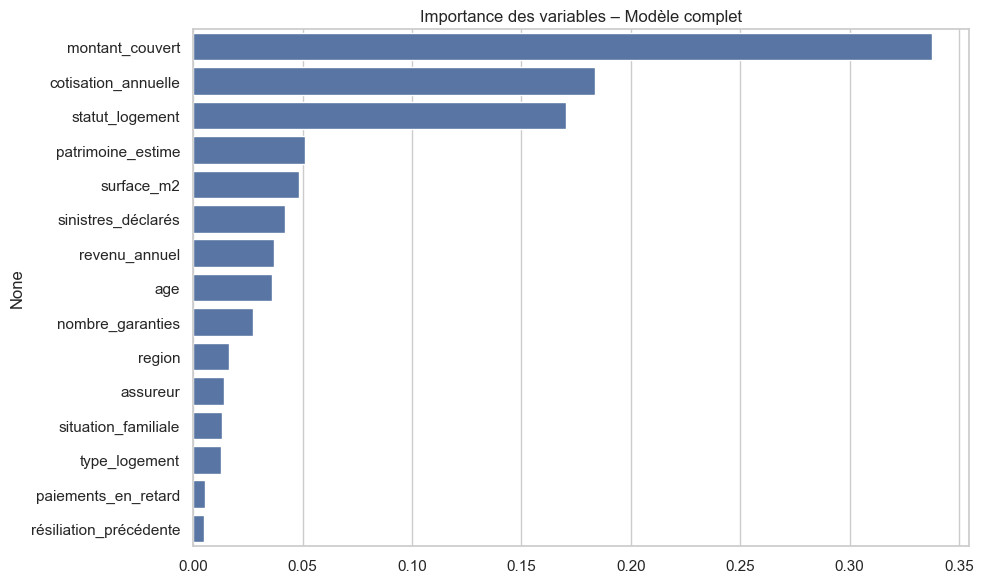

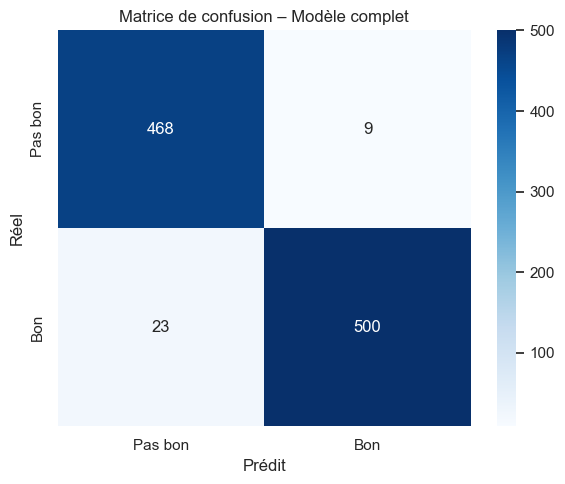

Temps d'entraînement du modèle complet : 0.27 secondes


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# 🔹 Modèle COMPLET
# -----------------------
features = ["age", "surface_m2", "patrimoine_estime", "revenu_annuel", "nombre_garanties",
            "montant_couvert", "cotisation_annuelle", "sinistres_déclarés"] + cat_cols
X = df_clean[features]
y = df_clean["label_bon_contrat"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.2, random_state=42)

model_full = RandomForestClassifier(n_estimators=100, random_state=42)
model_full.fit(X_train_f, y_train_f)
y_pred_f = model_full.predict(X_test_f)

# Importance des variables (complet)
importances_f = model_full.feature_importances_
feat_names_f = X.columns
sorted_idx_f = importances_f.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_f[sorted_idx_f], y=feat_names_f[sorted_idx_f])
plt.title("Importance des variables – Modèle complet")
plt.tight_layout()
plt.savefig("figures/importance_variables.png")
plt.show()

# Matrice de confusion (complet)
cm_f = confusion_matrix(y_test_f, y_pred_f)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_f, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pas bon", "Bon"], yticklabels=["Pas bon", "Bon"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Modèle complet")
plt.tight_layout()
plt.savefig("figures/matrice_confusion.png")
plt.show()

# temps entrainement
start_time = time.time()
model_full.fit(X_train_f, y_train_f)
end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement du modèle complet : {training_time:.2f} secondes")






# choix techinque 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       477
           1       0.99      0.99      0.99       523

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

[[471   6]
 [  4 519]]
Temps d'entraînement du modèle avec 2 features : 0.15 secondes


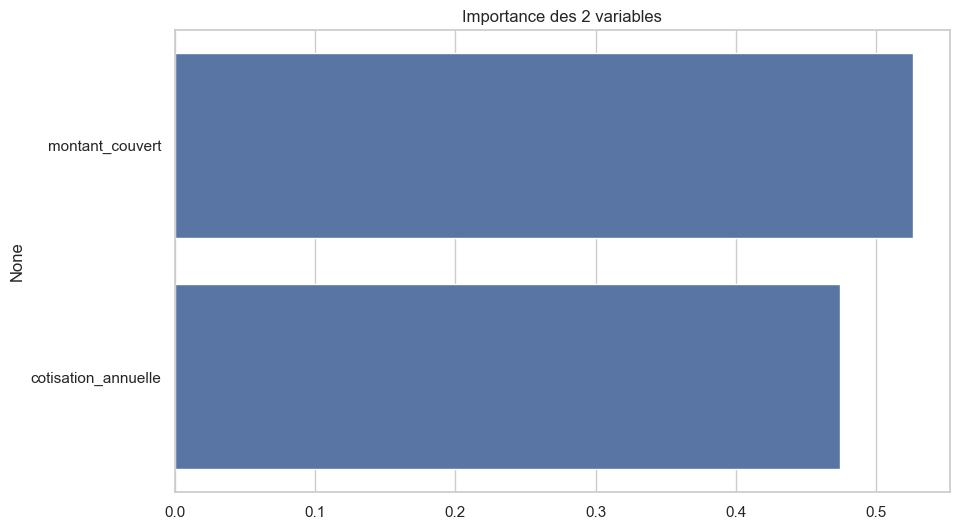

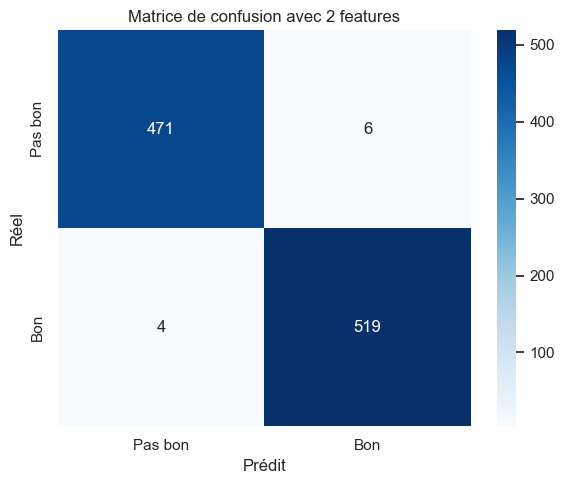

In [13]:
# Données réduites
X_reduit = df_clean[["montant_couvert", "cotisation_annuelle"]]
y = df_clean["label_bon_contrat"]

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduit, y, test_size=0.2, random_state=42)

# Modèle
model_3f = RandomForestClassifier(n_estimators=100, random_state=42)
model_3f.fit(X_train_r, y_train_r)
y_pred_r = model_3f.predict(X_test_r)

# Évaluation
print(classification_report(y_test_r, y_pred_r))
print(confusion_matrix(y_test_r, y_pred_r))
# Importance des variables
importances = model_3f.feature_importances_
feat_names = X_reduit.columns
sorted_idx = importances.argsort()[::-1]


plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feat_names[sorted_idx])
plt.title("Importance des 2 variables")
plt.savefig("figures/importance_variables_3features.png")
# matrice de confusion
cm = confusion_matrix(y_test_r, y_pred_r)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pas bon", "Bon"],
            yticklabels=["Pas bon", "Bon"]) 
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion avec 2 features")
plt.tight_layout()
# temps entrainement
start_time = time.time()
model_3f.fit(X_train_r, y_train_r)
end_time = time.time()
training_time_3f = end_time - start_time
print(f"Temps d'entraînement du modèle avec 2 features : {training_time_3f:.2f} secondes")



# comparasion de la perfomance des modéles

Le modèle réduit est 1.73 fois plus rapide.


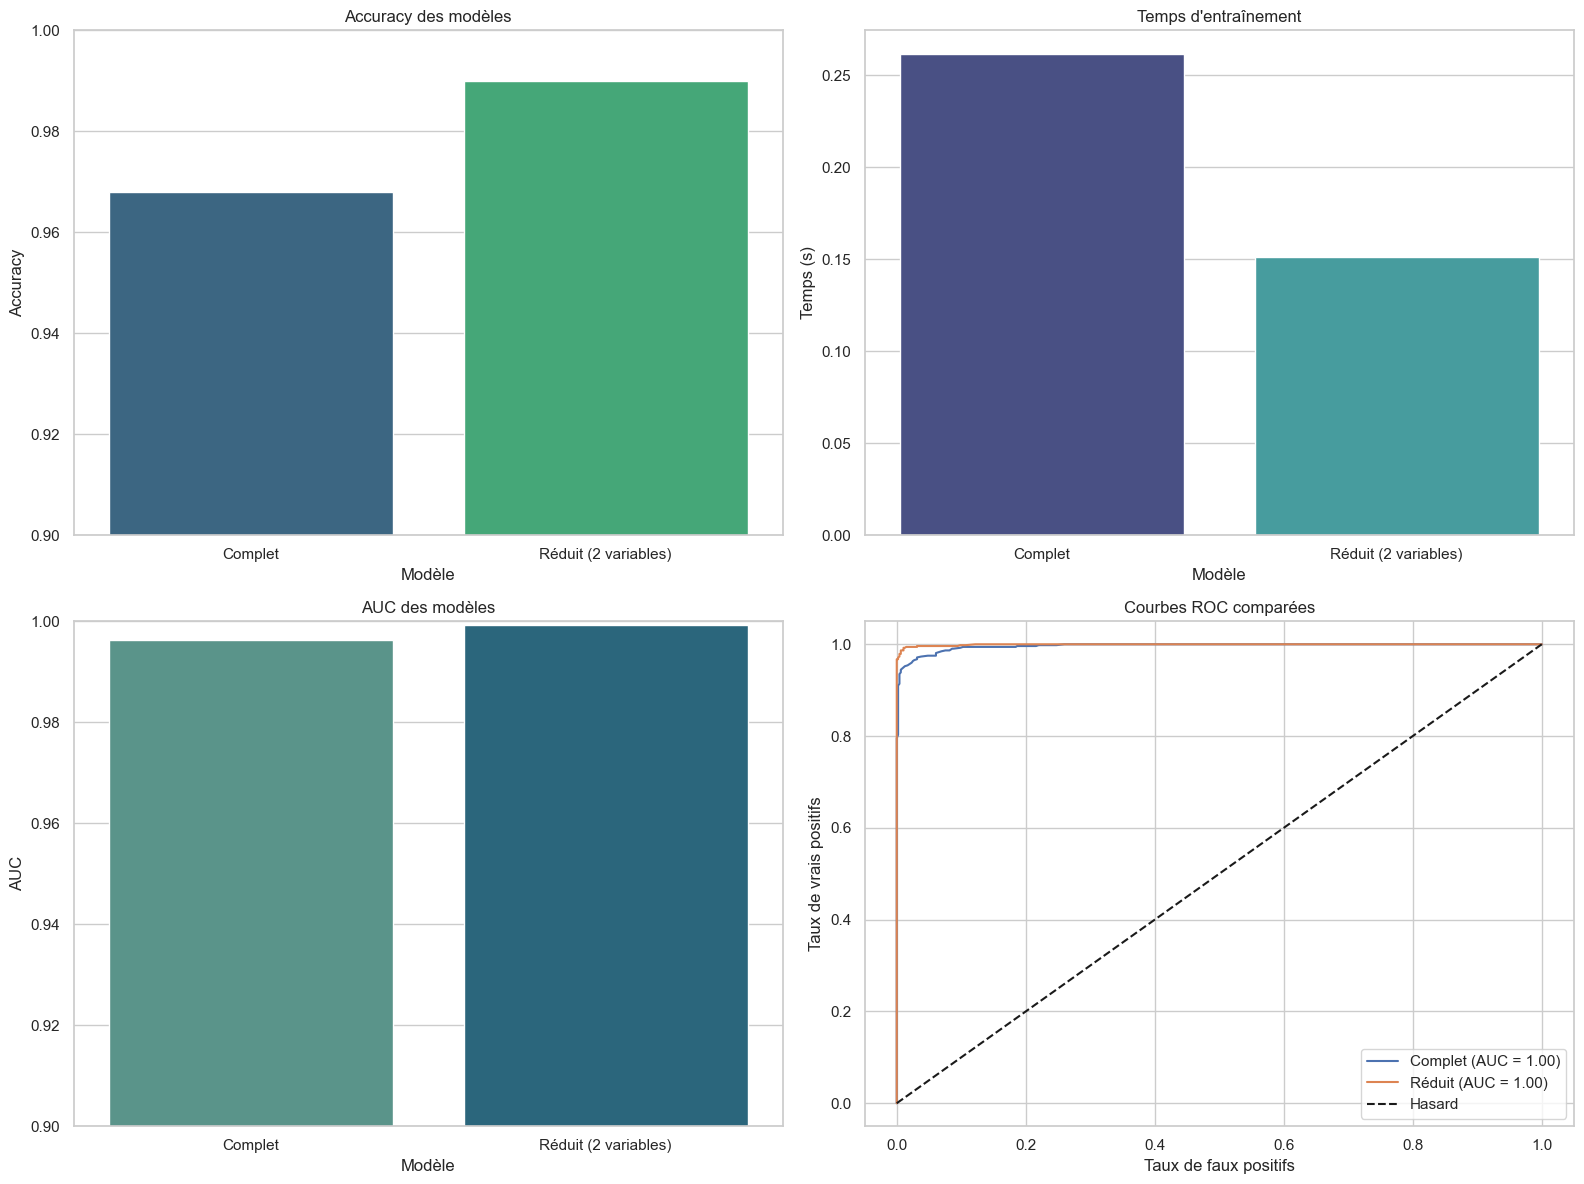

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score


# Recalcul des temps d'entraînement
start_f = time.time()
model_full.fit(X_train_f, y_train_f)
training_time = time.time() - start_f

start_r = time.time()
model_3f.fit(X_train_r, y_train_r)
training_time_3f = time.time() - start_r

# Accuracy
df_scores = pd.DataFrame({
    "Modèle": ["Complet", "Réduit (2 variables)"],
    "Accuracy": [
        model_full.score(X_test_f, y_test_f),
        model_3f.score(X_test_r, y_test_r)
    ]
})

# Temps
df_times = pd.DataFrame({
    "Modèle": ["Complet", "Réduit (2 variables)"],
    "Temps d'entraînement (s)": [training_time, training_time_3f]
})

# ROC + AUC
y_proba_full = model_full.predict_proba(X_test_f)[:, 1]
y_proba_reduit = model_3f.predict_proba(X_test_r)[:, 1]

fpr_f, tpr_f, _ = roc_curve(y_test_f, y_proba_full)
fpr_r, tpr_r, _ = roc_curve(y_test_r, y_proba_reduit)
auc_f = roc_auc_score(y_test_f, y_proba_full)
auc_r = roc_auc_score(y_test_r, y_proba_reduit)

df_auc = pd.DataFrame({
    "Modèle": ["Complet", "Réduit (2 variables)"],
    "AUC": [auc_f, auc_r]
})

# Figure combinée 2x2
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy
sns.barplot(data=df_scores, x="Modèle", y="Accuracy", hue="Modèle", palette="viridis",
            dodge=False, ax=axs[0, 0])
axs[0, 0].set_title("Accuracy des modèles")
axs[0, 0].set_ylim(0.9, 1.0)
axs[0, 0].set_ylabel("Accuracy")
if axs[0, 0].legend_:
    axs[0, 0].legend_.remove()

# 2. Temps
sns.barplot(data=df_times, x="Modèle", y="Temps d'entraînement (s)", hue="Modèle", palette="mako",
            dodge=False, ax=axs[0, 1])
axs[0, 1].set_title("Temps d'entraînement")
axs[0, 1].set_ylabel("Temps (s)")
if axs[0, 1].legend_:
    axs[0, 1].legend_.remove()

# 3. AUC
sns.barplot(data=df_auc, x="Modèle", y="AUC", hue="Modèle", palette="crest",
            dodge=False, ax=axs[1, 0])
axs[1, 0].set_title("AUC des modèles")
axs[1, 0].set_ylim(0.9, 1.0)
axs[1, 0].set_ylabel("AUC")
if axs[1, 0].legend_:
    axs[1, 0].legend_.remove()

# 4. Courbe ROC
axs[1, 1].plot(fpr_f, tpr_f, label=f"Complet (AUC = {auc_f:.2f})")
axs[1, 1].plot(fpr_r, tpr_r, label=f"Réduit (AUC = {auc_r:.2f})")
axs[1, 1].plot([0, 1], [0, 1], 'k--', label="Hasard")
axs[1, 1].set_xlabel("Taux de faux positifs")
axs[1, 1].set_ylabel("Taux de vrais positifs")
axs[1, 1].set_title("Courbes ROC comparées")
axs[1, 1].legend()

# differences de temps d'entraînement
print("Le modèle réduit est {:.2f} fois plus rapide.".format(training_time / training_time_3f))


# Sauvegarde
plt.tight_layout()
plt.savefig("figures/synthese_comparaison_modeles.png")
plt.show()


